In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os
import seaborn as sns

plt.style.use('seaborn-v0_8')


In [64]:
def moving_average(data, window_size):
    return data.rolling(window=window_size).mean()

In [65]:
# Define the base directory for your CSV files
base_dir = "training_data\\individual_rewards"

# Define the models and rewards
models = ['MLP', 'CNN', 'LSTM', 'CNN_nDR']
rewards = ['Collision', 'forward-velocity', 'Steering-Angle-Action', 'total']

# Initialize the dictionary to hold the data
training_data = {model: {reward: None for reward in rewards} for model in models}

# Function to load CSV data
def load_csv_data(file_path):
    if os.path.exists(file_path):
        return pd.read_csv(file_path)
    else:
        print(f"File not found: {file_path}")
        return None

# Populate the dictionary with data
for model in models:
    for reward in rewards:
        # Construct the filename based on the pattern
        filename = f"{model.lower()}-1000_{reward.lower()}.csv"
        file_path = os.path.join(base_dir, filename)
        
        # Load the data into the dictionary
        training_data[model][reward] = load_csv_data(file_path)

# Example: Accessing the collision data for the LSTM model
lstm_collision_data = training_data['LSTM']['Collision']

# # Display the data
# if lstm_collision_data is not None:
#     print(lstm_collision_data)
# else:
#     print("LSTM Collision data not found.")

# Optional: Print the dictionary keys to verify the structure
print(training_data.keys())  # Should print: dict_keys(['MLP', 'CNN', 'LSTM'])
print(training_data['LSTM'].keys())  # Should print: dict_keys(['Collision', 'Velocity', 'Steering_Angle'])

# Print the shape of the dataframes
for model in models:
    for reward in rewards:
        data = training_data[model][reward]
        if data is not None:
            print(f"{model} - {reward}: {data.shape}")
        else:
            print(f"{model} - {reward}: Data not found")


dict_keys(['MLP', 'CNN', 'LSTM', 'CNN_nDR'])
dict_keys(['Collision', 'forward-velocity', 'Steering-Angle-Action', 'total'])
MLP - Collision: (1000, 3)
MLP - forward-velocity: (1000, 3)
MLP - Steering-Angle-Action: (1000, 3)
MLP - total: (1000, 3)
CNN - Collision: (1000, 3)
CNN - forward-velocity: (1000, 3)
CNN - Steering-Angle-Action: (1000, 3)
CNN - total: (1000, 3)
LSTM - Collision: (1000, 3)
LSTM - forward-velocity: (1000, 3)
LSTM - Steering-Angle-Action: (1000, 3)
LSTM - total: (1000, 3)
CNN_nDR - Collision: (1000, 3)
CNN_nDR - forward-velocity: (1000, 3)
CNN_nDR - Steering-Angle-Action: (1000, 3)
CNN_nDR - total: (1000, 3)


In [72]:
def moving_average(data, window_size):
    return data.rolling(window=window_size).mean()

def plot_model_performance(training_data, model, window_size=10):
    # Extract data
    collision_data = training_data[model]['Collision']
    velocity_data = training_data[model]['forward-velocity']
    steering_data = training_data[model]['Steering-Angle-Action']
    total_reward_data = training_data[model]['total']

    # Assume that each CSV has columns 'Epoch' and 'Value'
    epochs = collision_data['Step']
    collisions = collision_data['Value']
    velocities = velocity_data['Value']
    steerings = steering_data['Value']
    total_rewards = total_reward_data['Value']

    # Apply moving average smoothing
    collisions_smooth = moving_average(collisions, window_size)
    velocities_smooth = moving_average(velocities, window_size)
    steerings_smooth = moving_average(steerings, window_size)
    total_rewards_smooth_real = moving_average(total_rewards, window_size)
    total_rewards_smooth = collisions_smooth + velocities_smooth + steerings_smooth

    # Calculate absolute values for normalization
    abs_collisions = collisions_smooth.abs()
    abs_velocities = velocities_smooth.abs()
    abs_steerings = steerings_smooth.abs()

    # Normalize to get performance share
    total_abs = abs_collisions + abs_velocities + abs_steerings
    collision_percent = abs_collisions / total_abs
    velocity_percent = abs_velocities / total_abs
    steering_percent = abs_steerings / total_abs

    # Plotting
    fig, ax1 = plt.subplots()

    # Use seaborn color palette
    sns_colors = sns.color_palette("muted")

    # Stacked area plot for reward components
    ax1.stackplot(epochs, velocity_percent, steering_percent, collision_percent, 
                  labels=['Velocity', 'Steering', 'Collisions'],
                  colors=sns_colors[:3])
    ax1.set_xlabel('Training Steps')
    ax1.set_ylabel('Performance Share')
    ax1.set_ylim(0, 1)  # Ensure y-axis goes from 0 to 1
    ax1.legend(loc='lower right')

    # Line plot for total reward
    ax2 = ax1.twinx()
    ax2.plot(epochs, total_rewards_smooth, 'k--', label='Episode Reward')
    # ax2.plot(epochs, total_rewards_smooth_real, 'k-', label='Episode Reward (Real)')

    ax2.set_ylabel('Episode Reward')
    ax2.legend(loc='upper right')

    plt.title(f'Model Performance for {model} (Smoothed)')
    plt.grid(True)
    plt.show()



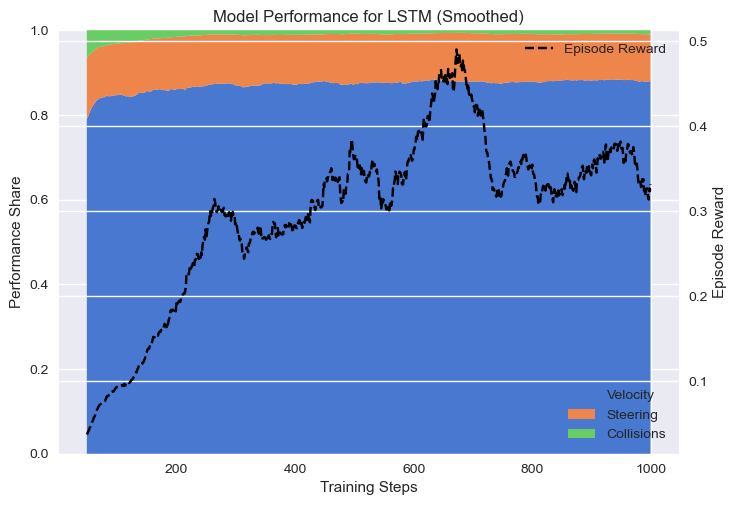

In [73]:
# Example usage
plot_model_performance(training_data, 'LSTM', 50)